Chapter 23
# 可视化Dirichlet分布
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from scipy.stats import dirichlet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

### 构造重心坐标系

In [2]:
# 定义等边三角形
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]]).T
triangle = tri.Triangulation(corners[0,:], corners[1,:])
refiner = tri.UniformTriRefiner(triangle)
trimesh_8 = refiner.refine_triangulation(subdiv=8)

In [4]:
# 自定义函数
def xy2bc(trimesh_8):
    
    # 每个列向量代表一个三角网格坐标点
    r_array = np.row_stack((trimesh_8.x,trimesh_8.y))

    r1 = corners[:,[0]]
    r2 = corners[:,[1]]
    r3 = corners[:,[2]]
    # 坐标转换
    T = np.column_stack((r1 - r3,r2 - r3))
    theta_1_2 = np.linalg.inv(T) @ (r_array - r3)
    theta_3 = 1 - theta_1_2[0,:] - theta_1_2[1,:]

    theta_1_2_3 = np.row_stack((theta_1_2,theta_3))
    theta_1_2_3 = np.clip(theta_1_2_3, 1e-6, 1.0 - 1e-6)
    theta_1_2_3 = theta_1_2_3/theta_1_2_3.sum(axis = 0) 
    # 归一化
    
    return theta_1_2_3


In [5]:
# 定义可视化函数

def plot_Dirichlet_PDF_contour(alpha_array):
    
    PDF = dirichlet.pdf(xy2bc(trimesh_8), alpha_array)
    
    fig, ax = plt.subplots(figsize = (5,5))

    plt.tricontourf(trimesh_8, PDF, 
                    levels = 20, 
                    cmap='RdYlBu_r')
    plt.axis('equal')
    plt.xlim(0, 1); plt.ylim(0, 0.75**0.5)
    plt.text(0.8, 0.45,  r'$\theta_1$')
    plt.text(0.15, 0.45, r'$\theta_2$')
    plt.text(0.5, -0.1,  r'$\theta_3$')
    plt.axis('off'); plt.title(alpha_array)  
    

### 不同参数

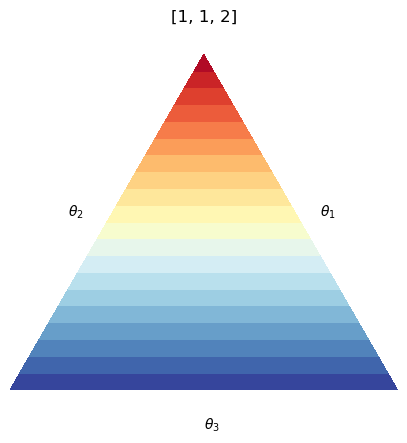

In [6]:
alpha_array = [1, 1, 2]
plot_Dirichlet_PDF_contour(alpha_array)

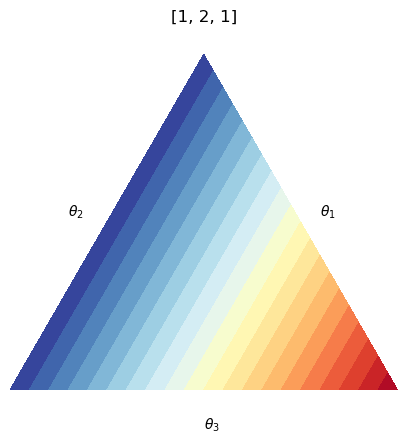

In [7]:
alpha_array = [1, 2, 1]
plot_Dirichlet_PDF_contour(alpha_array)

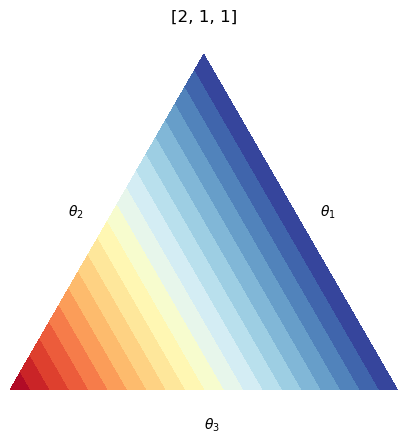

In [8]:
alpha_array = [2, 1, 1]
plot_Dirichlet_PDF_contour(alpha_array)

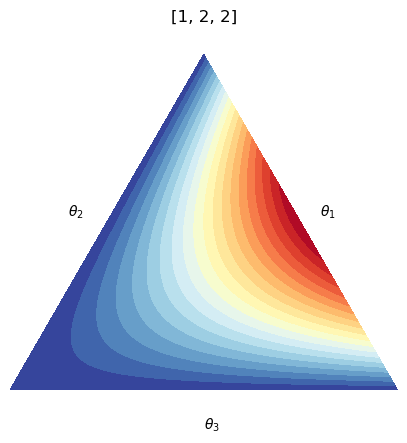

In [9]:
alpha_array = [1, 2, 2]
plot_Dirichlet_PDF_contour(alpha_array)

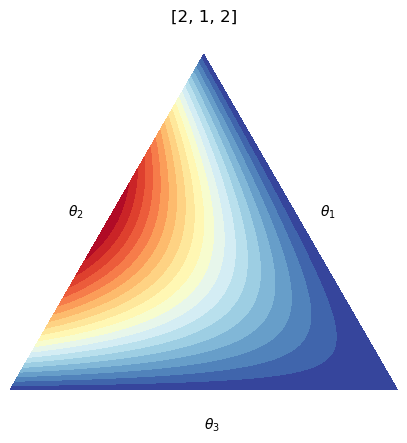

In [10]:
alpha_array = [2, 1, 2]
plot_Dirichlet_PDF_contour(alpha_array)

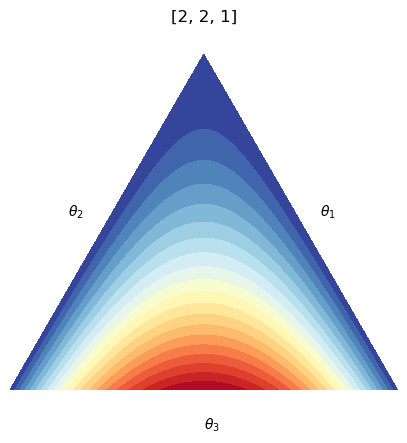

In [11]:
alpha_array = [2, 2, 1]
plot_Dirichlet_PDF_contour(alpha_array)

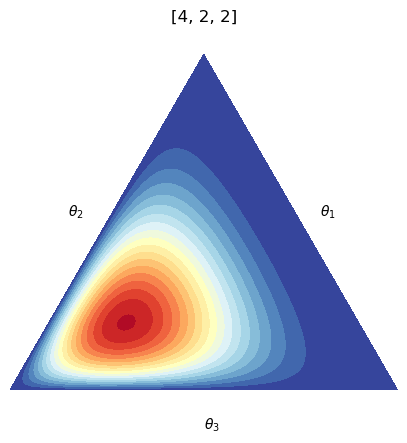

In [12]:
alpha_array = [4, 2, 2]
plot_Dirichlet_PDF_contour(alpha_array)

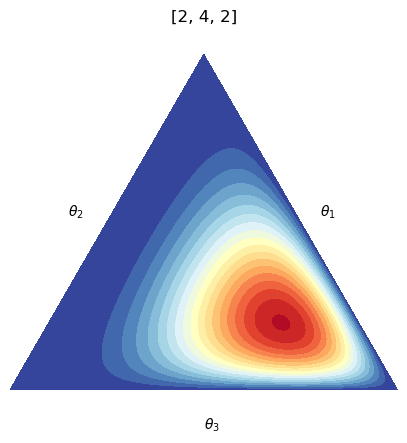

In [13]:
alpha_array = [2, 4, 2]
plot_Dirichlet_PDF_contour(alpha_array)

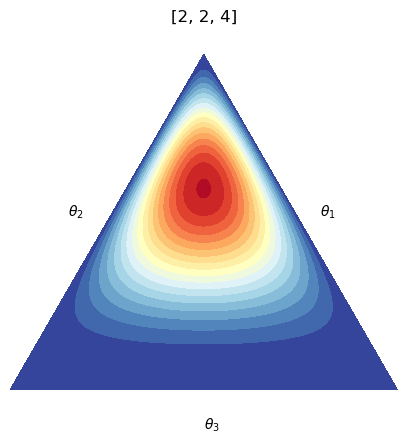

In [14]:
alpha_array = [2, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

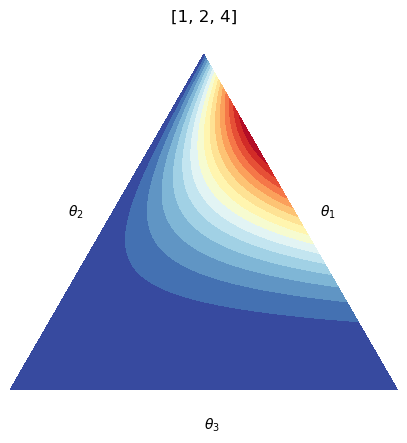

In [15]:
alpha_array = [1, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

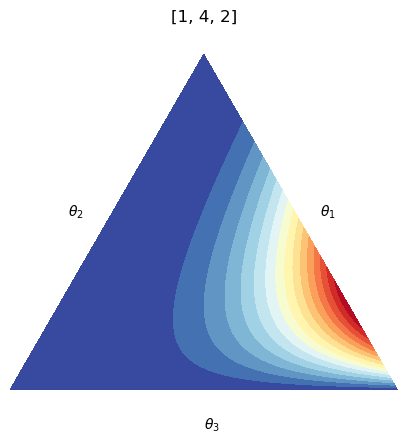

In [16]:
alpha_array = [1,4,2]
plot_Dirichlet_PDF_contour(alpha_array)

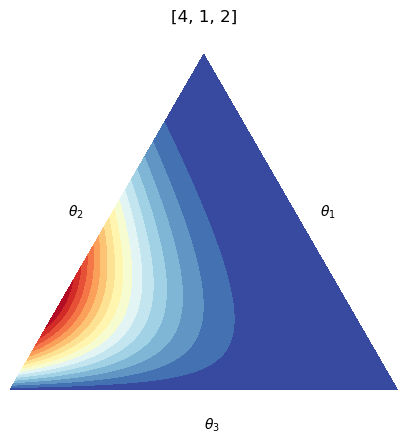

In [17]:
alpha_array = [4,1,2]
plot_Dirichlet_PDF_contour(alpha_array)

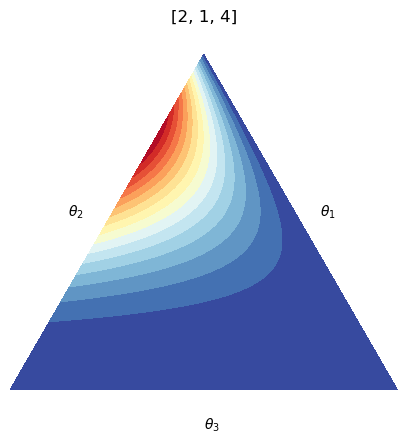

In [18]:
alpha_array = [2,1,4]
plot_Dirichlet_PDF_contour(alpha_array)

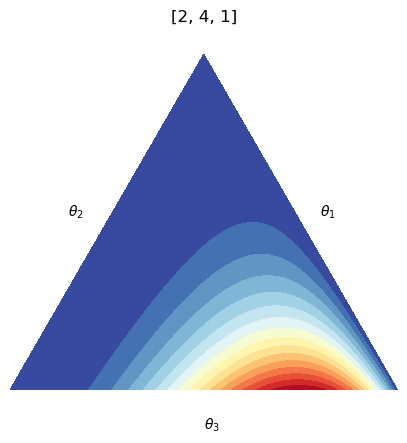

In [19]:
alpha_array = [2,4,1]
plot_Dirichlet_PDF_contour(alpha_array)

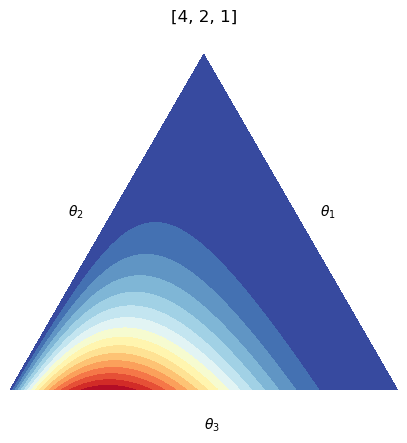

In [20]:
alpha_array = [4,2,1]
plot_Dirichlet_PDF_contour(alpha_array)

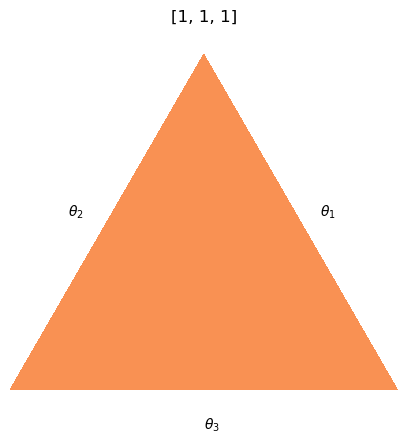

In [21]:
alpha_array = [1,1,1]
plot_Dirichlet_PDF_contour(alpha_array)

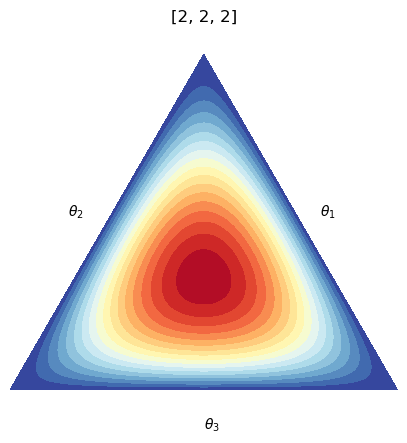

In [22]:
alpha_array = [2,2,2]
plot_Dirichlet_PDF_contour(alpha_array)

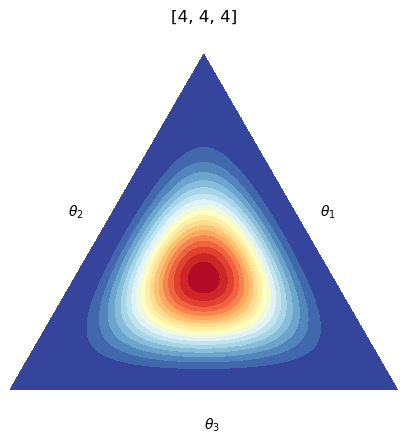

In [23]:
alpha_array = [4,4,4]
plot_Dirichlet_PDF_contour(alpha_array)

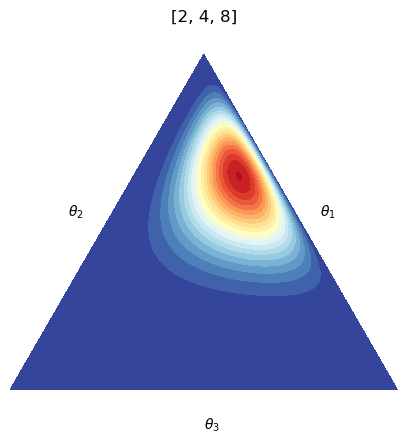

In [24]:
alpha_array = [2, 4, 8]
plot_Dirichlet_PDF_contour(alpha_array)

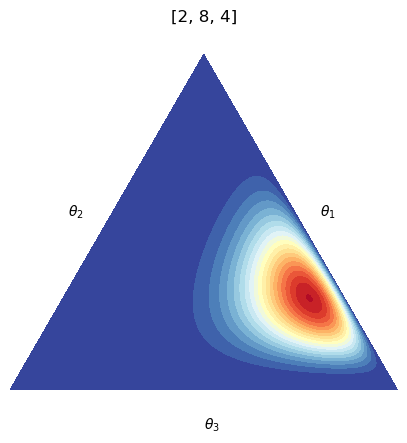

In [25]:
alpha_array = [2, 8, 4]
plot_Dirichlet_PDF_contour(alpha_array)

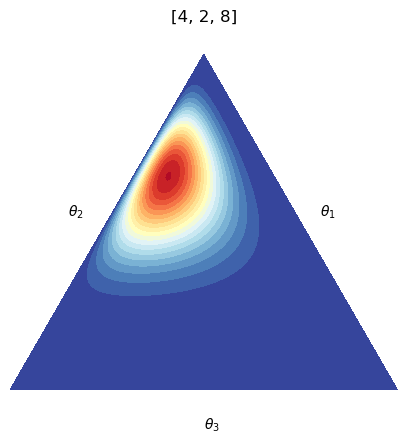

In [26]:
alpha_array = [4, 2, 8]
plot_Dirichlet_PDF_contour(alpha_array)

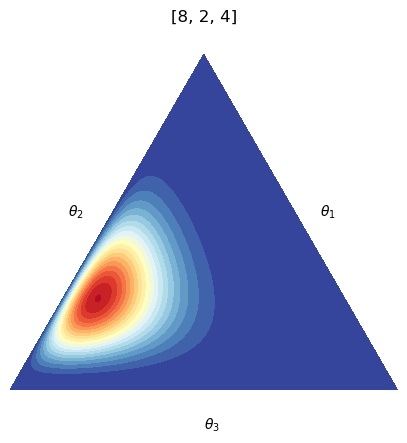

In [27]:
alpha_array = [8, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

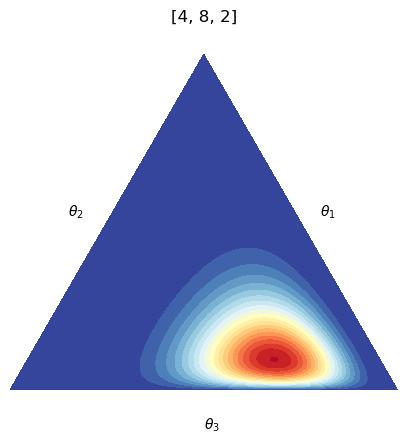

In [28]:
alpha_array = [4, 8, 2]
plot_Dirichlet_PDF_contour(alpha_array)

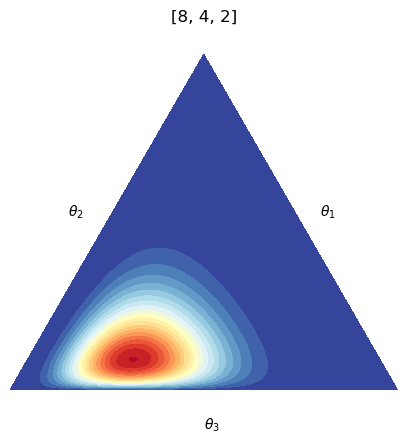

In [29]:
alpha_array = [8, 4, 2]
plot_Dirichlet_PDF_contour(alpha_array)

In [30]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023